<a href="https://colab.research.google.com/github/RenatodaCostaSantos/Machine-Learning---Lessons/blob/main/Supervised%20ML/Logistic%20regression/Logistic_regression_lesson_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression

A popular model used in classification problems is given by the logistic regression, it is the sister of linear regression, but for classification purposes (yes or no type of answers).

In this lesson, we will learn how it works under the hood and make explicit the mathematical machinery behind it. To clarify the abstract concepts, we will use the UCI Machine Learning Repository's Automobile [dataset](https://archive.ics.uci.edu/ml/datasets/Automobile) and test it in practice.

Let's start by loading the dataset:

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
auto = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/automobiles.csv')

In [ ]:
auto.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
1,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
2,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
3,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
4,2,192,bmw,gas,std,two,sedan,rwd,front,101.2,...,108,mpfi,3.50,2.8,8.8,101,5800,23,29,16430


The data contain 26 features. We will create a binary target variable called 'high price' which will show 1 for cars above $15,000 and 0 otherwise.

In [ ]:
# Create binary target variable
auto['high_price'] = auto['high_price'].apply(lambda x:  1 if x > 15000 else 0 )
auto.drop('price', axis = 1, inplace = True)

In [ ]:
auto['high_price'].value_counts()

0    119
1     40
Name: high_price, dtype: int64

In [ ]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          159 non-null    int64  
 1   normalized_losses  159 non-null    int64  
 2   make               159 non-null    object 
 3   fuel_type          159 non-null    object 
 4   aspiration         159 non-null    object 
 5   num_of_doors       159 non-null    object 
 6   body_style         159 non-null    object 
 7   drive_wheels       159 non-null    object 
 8   engine_location    159 non-null    object 
 9   wheel_base         159 non-null    float64
 10  length             159 non-null    float64
 11  width              159 non-null    float64
 12  height             159 non-null    float64
 13  curb_weight        159 non-null    int64  
 14  engine_type        159 non-null    object 
 15  num_of_cylinders   159 non-null    object 
 16  engine_size        159 non

There are no missing values but many of the features are non-numeric and would need to be transformed for machine learning. Since we will focus on the mathematical concepts rather than model building in this lesson, we will leave it as it is.

In [ ]:
# Check statistics
auto.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,high_price
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,0.735849,121.132075,98.264151,172.413836,65.607547,53.899371,2461.138365,119.226415,3.300126,3.236352,10.161132,95.836478,5113.836478,26.522013,32.081761,0.251572
std,1.193086,35.651285,5.167416,11.523177,1.947883,2.268761,481.941321,30.460791,0.267336,0.294888,3.889475,30.718583,465.754864,6.097142,6.459189,0.435288
min,-2.000000,65.000000,86.600000,141.100000,60.300000,49.400000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,15.000000,18.000000,0.000000
25%,0.000000,94.000000,94.500000,165.650000,64.000000,52.250000,2065.500000,97.000000,3.050000,3.105000,8.700000,69.000000,4800.000000,23.000000,28.000000,0.000000
50%,1.000000,113.000000,96.900000,172.400000,65.400000,54.100000,2340.000000,110.000000,3.270000,3.270000,9.000000,88.000000,5200.000000,26.000000,32.000000,0.000000
75%,2.000000,148.000000,100.800000,177.800000,66.500000,55.500000,2809.500000,135.000000,3.560000,3.410000,9.400000,114.000000,5500.000000,31.000000,37.000000,0.500000
max,3.000000,256.000000,115.600000,202.600000,71.700000,59.800000,4066.000000,258.000000,3.940000,4.170000,23.000000,200.000000,6600.000000,49.000000,54.000000,1.000000


The data seems clean enough for our purposes in this lesson. 

## Building a classifier

In [ ]:
# Split the data into features and target
X = auto.drop('high_price', axis = 1)
y = auto['high_price']

In [ ]:
# Split train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 731, stratify = y)

In [ ]:
y_train.value_counts()

0    95
1    32
Name: high_price, dtype: int64

In [ ]:
y_test.value_counts()

0    24
1     8
Name: high_price, dtype: int64

By turning on the stratify on the target variable of train_test_split, we keep the same proportions on the train and test sets. That helps to reduce bias when building a model by keeping the samples (train and test) as good representatives of the population ( train + test in this case).

## Understanding the logistic regression

The logistic regression is a model build by the following mathematical equation:
$$
EY = h(Z)
$$
where,
$$
Z = \alpha + \beta X.
$$
We need a function $h$ to connect the independent variable $X$ to the predictors $EY$ (predictors are the predictions for the real outcomes $y$).This is a way to map a classification problem, which is binary, into a linear regression kind of problem, which deals with real numbers (keep reading to see how it is done).

To illustrate this point, let's build a visualization. Let's check how the horsepower of an engine is related to the target variable high_price:

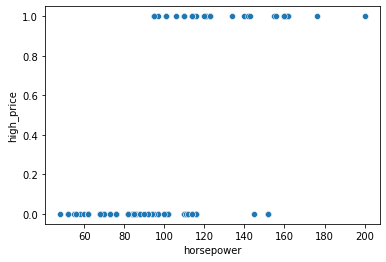

In [ ]:
sns.scatterplot(data = auto, x = 'horsepower', y = 'high_price')
plt.show()

There is no clear linear relation here, but the intuition to what we see in the graph above is similar to a linear relationship between two variables, i.e., cars with more powerful engines are *more likely* to be more expensive.

The simplicity of a linear regression model relies on its **assumption** that there is a linear relationship between the features and the target variable. The predictions for this model are made by fitting the line that minimize the distance between all data points of a sample to this hypothetical line. Assuming a linear relationship for the data above would be naive, since there is no evident linear relationship between both variables (despite the intuition we presented above).

The logistic regression model follows a similar idea to the linear regression model, but it assumes a more complicated function instead. That's the function $h$, called **logistic** or sigmoid function. Its definition is given by:
$$
h(X) = \frac{1}{1 + e^{-(\alpha + \beta X)}}.
$$

Let's visualize the sigmoid curve on the plot above, by choosing some random values for the parameters $\alpha$ and $\beta$:


In [ ]:
# Defining variables to visualize how the logistic function acts on the data
Z = -7 + 0.05*auto['horsepower']
hZ = 1/(1+np.exp(-Z))
# Save EY in a column for the horsepower
auto['EY_horsepower'] =  1/(1+np.exp(-(-7 + 0.05*auto['horsepower']))) 

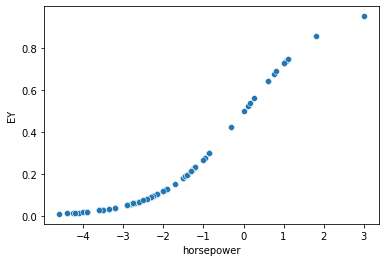

In [ ]:
sns.scatterplot(data = auto, x = Z, y = hZ)
plt.ylabel('EY')
plt.show()

Note that, given some feature of the dataset, the logistic function returns a value $EY$ between 0 and 1. The target variable values $y$ are either 0 or 1, but not something in between. The interpretation given to the result of the logistic transformation is the probability of obtaining a positive value for the target.

## Probability, odds and log-odds

So we know how to calculate the predictors $EY$ using the non-trivial logistic function once we have the independent variables $X$. However, in order to interpret the logistic regression model more clearly it is useful to find the inverse problem, *i.e.*, how the predictors influence the variables $X$. In other words, we want to find a function:
$$
X = f(EY).
$$

Let's do the maths starting with the logistic regression model:
$$ 
EY = h(Z),\\
Z = \alpha + \beta*X
$$
by taking the inverse of the $h$ function we obtain:
$$
h^{-1}(EY) = Z.
$$
Since we know that,
$$
EY = h(Z) = \frac{1}{1 + e^{-Z}}\\
1 + e^{-Z} = \frac{1}{EY}\\
Z = log(\frac{EY}{1-EY}).
$$
Thus,
$$
log(\frac{EY}{1-EY}) = \alpha + \beta*X.
$$

Compare it to the linear regression model
$$
Y = \alpha + \beta*X.
$$

In the linear regression model the coefficients $\alpha$ and $\beta$ are chosen to minimize the distance from the line to all dataset points, that is not the same in the logistic regression model.

The difference is that the linear relation is not between the features and the outcomes, but an explicitly function of the probability of obtaining a positive result for the target. This function is very important in machine learning and is named **logit function**. It tells how the predictors $EY$ influence the features (just isolate $X$ on the last equation and you have $X$ in function of $EY$). Because it 'links' a function of the predictor with a linear model, it is commonly said that the logit function is the link function for the logistic regression model.

As we saw above, $EY$ returns a value between 0 and 1. It is interpreted as the probability of obtaining the value 1 given a feature of of a dataset. In our example, it gives the probability of a value of a car to be above $15,000.

Since it is easier to work with linear models, it is tempting **not** to use the $EY$ values and the sigmoid function but the linear model that is linked to the logit function. The argument of the logit function also has a well known meaning, it is called the odds. In mathematical terms, the odds are defined by:
$$
odds = \frac{EY}{1-EY},
$$
It measures the likelyhood of obtaining a particular outcome. Instead of varying in the interval [0,1], it varies from [0, $\infty$]. 

Another name for the logit function is then log-odds. It is a function varying from [-$\infty$, $\infty$] and since it is connect to the linear model, we know that the straight line on the linear version of the logistic regression also varies from -$\infty$ to $\infty$.

Let's visualize that afirmation in the auto dataset:



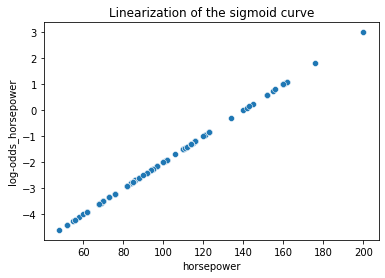

In [ ]:
# Create a log-odds column
auto['log-odds_horsepower'] = np.log(auto['EY_horsepower']/(1-auto['EY_horsepower']))

# Plot log-odds versus horsepower (what kind of relation would you expect to see?)
sns.scatterplot(data = auto, x = 'horsepower', y = 'log-odds_horsepower').set(title = 'Linearization of the sigmoid curve')
plt.show()


As expected, the relationship between the horsepower and the log-odds of the this feature is linear.

The question now is, what is the meaning of the coefficients of the linear relationship and how do we calculate the best set of parameters?


## Logistic cost function

We  will focus on the second question in this lesson: How do we choose the best coefficients for a logistic regression model?

First, we must say there is no closed form for the solution of this problem. This means there is no mathematical formula that we can always use to calculate the coefficients.

For the linear regression, one can minimize the sum of the squared errors which leads to a closed form mathematical equation for the coefficients:
$$
\beta_{linreg} = (X^TX)^{-1}X^TY 
$$
There is no such expression for the logistic regression.

The way around it is to use a log-loss cost function. For a binary classification problem it is defined by:
$$
L_{logreg}(\alpha,\beta) = 
\begin{cases}
  -\log(h(\alpha + \beta*X)), \hspace{1cm} \text{if} \hspace{1cm}  y= 1, \\
 -\log(1 - h(\alpha + \beta*X)), \hspace{1cm} \text{if} \hspace{1cm}  y= 0.
\end{cases}
$$
Since $EY = h(X)$ we know that the argument of the logarithm functions above varies from [0,1]. This implies the log of the argument varies from $[\infty, 0]$ for $y = 1$, *i.e.*, the loss tends to infinity when the probability of predicting 1 is low for a car that is known to have a high price  (in other words, loss goes to infinity when probability of predicting 1 goes to 0 when y = 1). That is just a way to let us know the model is doing badly. On the contrary, the loss function goes to zero when the probability of predicting 1 is high for a car that is known to have a high. 

Same idea when y = 0. However, the values vary from $[0,\infty]$, i.e., the loss tends to zero when the probability of predicting 1 is low for a car that is known to have low price. The model is doing well in this case. On the other side, the loss tend to infinity when the probability of predicting 1 is high for a car that is known to have a low price. The model is doing badly in this case.


Let's visualize this functions using the EY_horsepower feature we created above:

In [ ]:
# Creating variable for the log-loss cost functions
auto['L'] = 0
auto.loc[auto['high_price'] == 0,  'L'] = -np.log(1 - auto['EY_horsepower'])
auto.loc[auto['high_price'] == 1, 'L'] = -np.log(auto['EY_horsepower'])

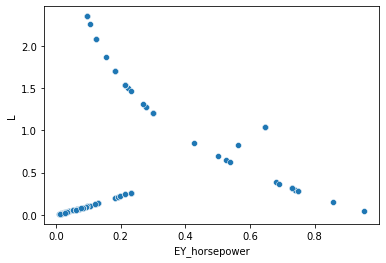

In [ ]:
# visualizing log-loss cost functions for a binary target 
sns.scatterplot(data = auto, x = 'EY_horsepower', y = 'L')
plt.show()

We can see the two behaviors described above. A monotonically increasing function when $y = 0$ and a monotonically decreasing function when $y= 1$. The model is doing well for some of the data and badly for others. But how do we select the best model?

## Gradient descent

The rigorous mathematical calculation to find the optimal model is done by using gradient descent. Let's do a quick reminder of how it works.

Suppose we want to find the minimum value $x = x_0$ for a function $f(x)$. The way linear gradient descent approach this problem is to start with a random choice for the initial value of the argument, $x=x_1$, and iterativaly update it through the following equation:
$$
\begin{aligned}
x_n = x_{n-1} -  \vec{\lambda} \cdot \nabla  f(x_{n-1}).
\end{aligned}
$$
Here $x_n$ is the next value, $\vec{\lambda}$ is called the learning ratio and $\nabla f(x_{n-1})$ is the gradient operator acting on the function at $x_{n-1}$.

A few important comments:

- Choosing the learning ratio wisely is important. If it is too small, the algorithm can reach the maximum amount of steps without finding the minimum. If it is too big, it can bypass the minimum and never get close to it.

- The minus sign represents the fact that we want to find the minimum, so the  steps are towards a smaller value of $x$. To find the maximum of a function one would just change it to a plus sign.

- The gradient finds a direction at the function's hypersurface where it grows more quickly. By subtracting its value (multiplied by the learning rate) we are making sure we are trying to approach the minimum more quickly.

That's how linear GD generally works. A more detailed explanation can be found [here](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21).

## Grandient descent and the loss function

The mean of the total log-loss function is given by:
$$
L^{avg}_{logreg}(\alpha, \beta) = \frac{1}{n}\bigg[\sum_{i=1}^{n}\big(- y_i*\log(h(\alpha + \beta X_i)) - (1-y_i)*\log(1 - h(\alpha + \beta X_i))\big)\bigg],
$$
where $i$ runs over every single observation. It is easy to see that it recovers the two different expressions given a value for $y$. This is the function we want to minimize in order to obtain the best values for the coefficients $\alpha$ and $\beta$.

Comment:

- Every single observation $(X_i,y_i)$ leads to a single loss **function** of the parameters $(\alpha,\beta)$. Minimizing one function would mean minimizing the loss for only one observation, however, we want the best **model** so we need to find a way to include all possible observations and find the values of the parameters $\alpha$ and $\beta$ that better represents all observations. That's why one chooses the average of the total loss here. 

Since 
$$
\nabla L(\alpha, \beta) = \frac{\partial L}{\partial \alpha} \hat{\alpha} +\frac{\partial L}{\partial \beta} \hat{\beta},
$$
we start by calculating the partial derivatives for the log-loss function:
$$
\begin{aligned}
\frac{\partial L}{\partial \alpha} &= \frac{1}{n}\bigg( \sum_{i=1}^{n} \bigg[y_i \frac{1}{h(X_i)} + (1-y_i) \frac{1}{(1 - h(X_i))}\bigg]\frac{\partial h}{\partial \alpha} \bigg)&\\
&= \frac{1}{n}\bigg( \sum_{i=1}^{n} \bigg[\frac{y_i(1 - h(X_i)) - (1- y_i)h(X_i) }{h(X_i)(1 - h(X_i))} \bigg]\frac{\partial h}{\partial \alpha} \bigg)&\\
 &= \frac{1}{n}\bigg( \sum_{i=1}^{n} \bigg[\frac{h(X_i) - y_i  }{h(X_i)(1 - h(X_i))} \bigg]\frac{\partial h}{\partial \alpha}\bigg)&.
\end{aligned}
$$
It is not hard to show that
$$
\frac{\partial h}{\partial \alpha} = h^2 e^{-(\alpha + \beta X_i)}
$$ 
and
$$
1 - h(X_i) = h(X_i) e^{-(\alpha + \beta X_i)}
$$
So, we finally have
$$
\frac{\partial L}{\partial \alpha} = \frac{1}{n}\sum_{i=1}^{n}(h(\alpha + \beta X_i) - y_i).
$$
Similar calculations lead to:
$$
\frac{\partial L}{\partial \beta} = \frac{1}{n}\sum_{i=1}^{n}X_i (h(\alpha + \beta X_i) - y_i).
$$





















 


## Gradient descent implementation

Let's apply this theory in the dataset we have in hands. First let's define the gradient descent function. It will take six parameters:

- x: an array of values representing the independent variables (features) that will be used in the logistic regression,

- outcomes: an array of values reprenting the outcomes associated to the x.

- init: an array containing two values for our initial guess for the parameters we want to minimize,

- iterations: the number of iterations the algorithm should take. We will set a default number of 1000.

- learning_rate: a number representing the value of each step. The default will be 0.0001.

- stopping_threshold: a number representing the maximum difference between the estimated parameters. The default is 1e-6. 


In [ ]:
def gradient_descent(x, outcomes, init = np.array([0,0]), iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6):
  
  previous_cost = None
  alpha0 = init[0]
  beta0 = init[1]

  # Perform iterations
  for i in range(iterations):
    # Calculate predictors EY = hz (here it is a vector containing the predictors for all values o X)
    hz = 1/(1+np.exp(-(alpha0+beta0*x)))
    # Calculate the cost function (it is also a vector)
    cost = -outcomes*np.log(hz) - (1-outcomes)*np.log(1-hz)

    if previous_cost and (abs(previous_cost) - cost <= stopping_threshold):
      break
    
    alpha0 = alpha0 - learning_rate*np.mean(hz - outcomes)
    beta0 = beta0 - learning_rate*np.mean(x*(hz - outcomes))
    

  return np.array([alpha0,beta0])

In [ ]:
# Test GD algorithm in the auto dataset
alpha, beta = gradient_descent(auto['horsepower'],auto['high_price'])

In [ ]:
print(f'The best values for the coefficients for the logistic model, according to gradient_descent function, was: alpha = {alpha:.6f} and beta = {beta:.6f}')

The best values for the coefficients for the logistic model, according to gradient_descent function, was: alpha = -0.010700 and beta = -0.006042


The function above exemplifies how gradient descent could be performed in practice. However, there is room for improvement here. 

One can see that if the number of iterations is too low, the minimum value for the cost function could not be reached. If the learning rate is too small or too big, the minimum could also not be reached.

One way to improve the function above is to print the number of iterations that took for the algorithm to end. If the maximum amount of iterations is reached, it is a good sign that the number of iterations and/or the number of learning rate should be slightly increased.

One could also change the initial conditions, but we have no guidance to check how we should change it to make the algorithm better.

Let's print how many iterations the algorithm takes for a given values of the initial conditions and experiment with it to prove this point:

In [ ]:
def gradient_descent(x, outcomes, init = np.array([0,0]), iterations = 1000, learning_rate = 0.0001, stopping_threshold = 1e-6):
  
  previous_cost = None
  alpha0 = init[0]
  beta0 = init[1]


  # Perform iterations
  for i in range(iterations):
    # Calculate predictors EY = hz (here it is a vector containing the predictors for all values o X)
    hz = 1/(1+np.exp(-(alpha0+beta0*x)))
    # Calculate the cost function (it is also a vector)
    cost = -outcomes*np.log(hz) - (1-outcomes)*np.log(1-hz)

    number_iterations = i + 1 

    if previous_cost and (abs(previous_cost) - cost <= stopping_threshold):
      break
    
    alpha0 = alpha0 - learning_rate*np.mean(hz - outcomes)
    beta0 = beta0 - learning_rate*np.mean(x*(hz - outcomes))
    

  return np.array([alpha0,beta0, int(number_iterations)])

First test with initial conditions $\alpha = -7$ and $\beta = 0.01$.

In [ ]:
# Test GD algorithm in the auto dataset alpha0 = -7, beta0 = 0.01
alpha, beta, iterations = gradient_descent(auto['horsepower'],auto['high_price'], init = np.array([-7,0.01]))

In [ ]:
print(f'Initial conditions alpha = -7 and beta = 0.01 implies {iterations} iterations and best coefficients alpha = {alpha:.6f} and beta = {beta:.6f}')

Initial conditions alpha = -7 and beta = 0.01 implies 999.0 and best coefficients alpha = -7.000367 and beta = 0.057514


Second test with initial conditions $\alpha = 0$ and $\beta = 0$.

In [ ]:
# Test GD algorithm in the auto dataset alpha0 = 0, beta0 = 0
alpha, beta, iterations = gradient_descent(auto['horsepower'],auto['high_price'], init = np.array([0,0]))

In [ ]:
print(f'Initial conditions alpha = -7 and beta = 0.01 implies {iterations} iterations and best coefficients alpha = {alpha:.6f} and beta = {beta:.6f}')

Initial conditions alpha = -7 and beta = 0.01 implies 999.0 and best coefficients alpha = -0.010700 and beta = -0.006042


Third test with initial conditions $\alpha = -4$ and $\beta = 3$.

In [ ]:
# Test GD algorithm in the auto dataset alpha0 = -4, beta0 = 3
alpha, beta, iterations = gradient_descent(auto['horsepower'],auto['high_price'], init = np.array([-4,0.1]))

In [ ]:
print(f'Initial conditions alpha = -7 and beta = 0.01 implies {iterations} and best iterations coefficients alpha = {alpha:.6f} and beta = {beta:.6f}')

Initial conditions alpha = -7 and beta = 0.01 implies 999.0 and best coefficients alpha = -4.004111 and beta = 0.030750


All tries achieved the maximum number of iterations and didn't move too far from the original values for the parameters and are far from each other. It suggests that we should increase the learning rate or the number of iterations of the algorithm as we pointed out above.

# Summary

In this lessor we learned:

- The logistic regression is used for classification problems.
- How it differs from the linear regression.
- How the logit function links the probability of an outcome to a linear model.
- There is no closed form to find the best parameters for the algorithm.
- How the log-loss cost function is used to find the best parameters for the model.
- How gradient descent allows one to find the optimal parameters for a logistic regression model.